# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [68]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [69]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [70]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 60


## Modelo

In [71]:
model = torch.nn.Linear(28*28, 10)

In [72]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.4519, -0.1585, -0.0236,  0.8168,  0.4161, -0.2375,  0.4543,  0.8583,
          0.7011,  0.9826]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [19]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [20]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [21]:
print('Final loss:', loss.data)

Final loss: tensor(0.2887)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

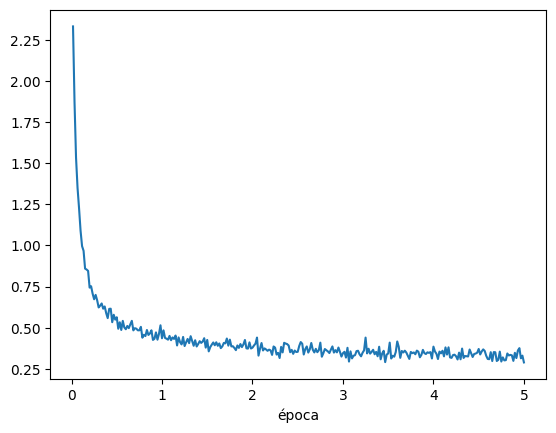

In [22]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

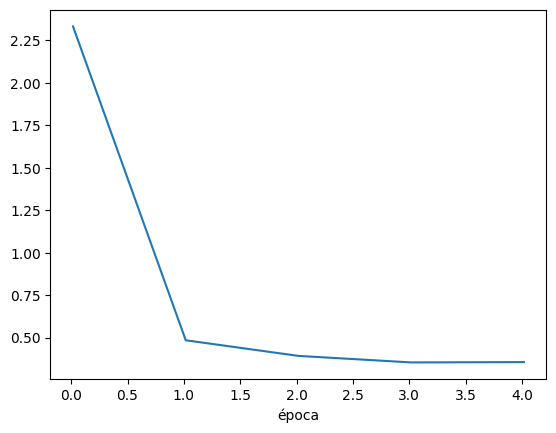

In [23]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

1. O numero de mini-batches definido acima foi batch foi batch_size = 1000, e a dimensão é de [1000, 1, 28, 28], ou seja, um mini-batch contem 100 exemplos, com 1 canal e de dimensão de imagem 28x28
2. Como o dataset tem um número de amostras de 60m mil, e o numero definido de batch foi batch_size = 1000, logo teremos 60 mini-batches por epoca
3. Iteração sobre todos os dados de treinamento

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

1.

In [73]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [74]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        print(f'Época: {i}/{n_epochs - 1}, batch: {k}/{len(loader_train)}')

Época: 0/4, batch: 0/60
Época: 0/4, batch: 1/60
Época: 0/4, batch: 2/60
Época: 0/4, batch: 3/60
Época: 0/4, batch: 4/60
Época: 0/4, batch: 5/60
Época: 0/4, batch: 6/60
Época: 0/4, batch: 7/60
Época: 0/4, batch: 8/60
Época: 0/4, batch: 9/60
Época: 0/4, batch: 10/60
Época: 0/4, batch: 11/60
Época: 0/4, batch: 12/60
Época: 0/4, batch: 13/60
Época: 0/4, batch: 14/60
Época: 0/4, batch: 15/60
Época: 0/4, batch: 16/60
Época: 0/4, batch: 17/60
Época: 0/4, batch: 18/60
Época: 0/4, batch: 19/60
Época: 0/4, batch: 20/60
Época: 0/4, batch: 21/60
Época: 0/4, batch: 22/60
Época: 0/4, batch: 23/60
Época: 0/4, batch: 24/60
Época: 0/4, batch: 25/60
Época: 0/4, batch: 26/60
Época: 0/4, batch: 27/60
Época: 0/4, batch: 28/60
Época: 0/4, batch: 29/60
Época: 0/4, batch: 30/60
Época: 0/4, batch: 31/60
Época: 0/4, batch: 32/60
Época: 0/4, batch: 33/60
Época: 0/4, batch: 34/60
Época: 0/4, batch: 35/60
Época: 0/4, batch: 36/60
Época: 0/4, batch: 37/60
Época: 0/4, batch: 38/60
Época: 0/4, batch: 39/60
Época: 0/4

Text(0.5, 0, 'época')

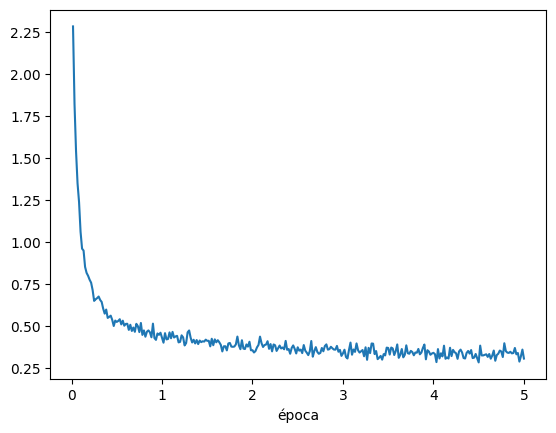

In [41]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

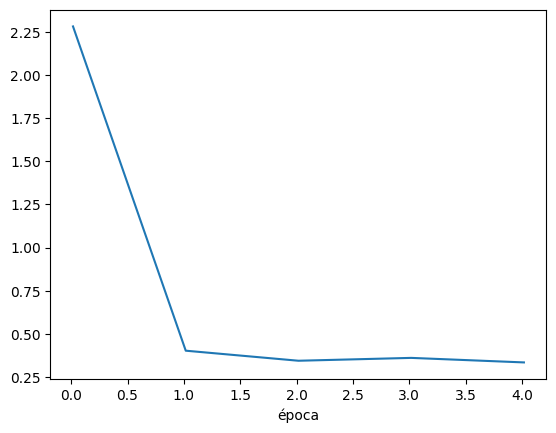

In [42]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Diminuindo o batch size para 100

Text(0.5, 0, 'época')

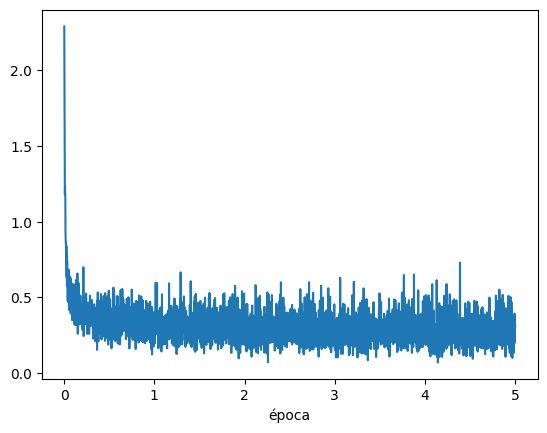

In [56]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

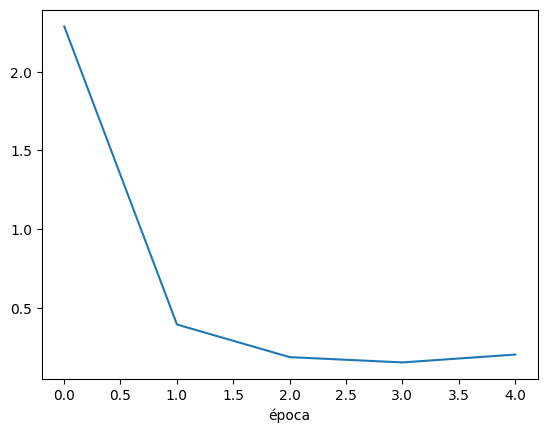

In [57]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Aumentando o mini-batch para 6000

Text(0.5, 0, 'época')

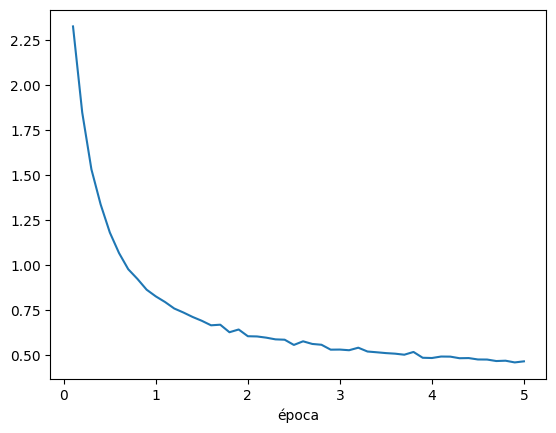

In [66]:
plt.plot(epochs, losses)
plt.xlabel('época')

Text(0.5, 0, 'época')

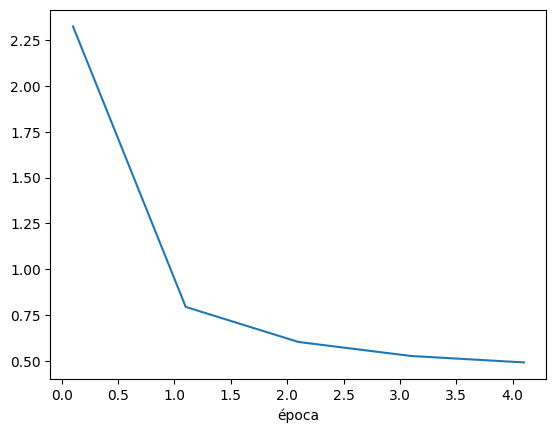

In [67]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

Quanto temos um tamanho pequeno de mini-batch, há uma alta variação da perda a cada mini-batch, resultando num grafico mais "brusco" e com varios ruidos, além disso a cada epoca os valores de perda flutuam bastante.
Já com tamanhos de mini-batch maiores, notamos justamente o contrário, como se observa no gráfico mais suavem, sem muitas variações de perda a cada epoca e sem muitos ruídos

## Conclusões sobre os experimentos deste notebook
